In [1]:
import os
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [2]:
DATA_PATH = './data/trump_posts_emotions.csv'
df = pd.read_csv(DATA_PATH, error_bad_lines=False, index_col=False)
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,text_cleaned,emotional_state
0,Twitter for iPhone,Democrats just blocked @FoxNews from holding a...,3/7/19 0:05,39620,163793,False,1.103450e+18,democrat block hold debat good think thing fak...,[[[0. 0. 0. 0. ...
1,Twitter for iPhone,Wall Street Journal: “More migrant families cr...,3/7/19 0:02,23578,94096,False,1.103450e+18,wall street journal migrant famili cross u ill...,[[[0.25 0.448 0.321 0.569]\n [0. 0. 0....
2,Twitter for iPhone,Congressman Chris Stewart: “No one is accusing...,3/6/19 23:56,24546,88892,False,1.103440e+18,congressman chri stewart one accus presid crim...,[[[0.5 0.071 0.943 0.63 ]\n [0. 0. 0....
3,Twitter for iPhone,American Workforce Policy Advisory Board Meeti...,3/6/19 22:04,10818,43018,False,1.103420e+18,american workforc polici advisori board meet,[[[0. 0. 0. 0. ]\n [1. 0.592 0....
4,Twitter for iPhone,It is shameful that House Democrats won’t take...,3/6/19 19:50,28268,107157,False,1.103380e+18,shame hous democrat take stronger stand anti s...,[[[0.25 0.102 0.793 0.625]\n [0. 0. 0....


In [3]:
import re
raw_emotion_matrix = df['emotional_state']
flattened_emotions = []

for emotion in raw_emotion_matrix:

    emotion = emotion[2:-2].split()
    flat = []
    for s in emotion:
        try:
            s = s.strip('[')
            s = s.strip(']')
            #print(s)
            flat.append(float(s))
        except ValueError:
            pass
        
    flattened_emotions.append(flat)
emotion_vec = flattened_emotions
flattened_emotions[0:9]

[[0.0,
  0.0,
  0.0,
  0.0,
  0.33333333,
  0.7345,
  0.3525,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666667,
  0.938,
  0.368,
  0.534,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666667,
  0.938,
  0.368,
  0.534,
  0.33333333,
  0.8025,
  0.461,
  0.5975],
 [0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.594,
  0.443,
  0.821],
 [0.5,
  0.071,
  0.943,
  0.63,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.438,
  0.471,
  0.877],
 [0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.592,
  0.255,
  0.385,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 

In [4]:
# Standardizing the features
flattened_emotions = StandardScaler().fit_transform(flattened_emotions)

In [5]:
# PCA projection to 1D
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(flattened_emotions)
principalComponents

array([[ 1.51148794],
       [ 1.85446473],
       [-0.47193559],
       ...,
       [ 5.74228726],
       [-3.35451162],
       [-3.35451162]])

In [6]:
import datetime as dt
# Extract date and calculate duration from now
df['date'] = pd.to_datetime(df['created_at'])
df['duration'] = dt.datetime.now().date() - df['date']
df['duration'] = df['duration'].dt.total_seconds()
durations = df['duration']

In [7]:
x = []
for d, p in zip(durations, principalComponents):
    x.append([d, p[0]])

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-1.86326637,  0.51821725],
       [-1.86326198,  0.63580766],
       [-1.8632532 , -0.16180424],
       ...,
       [ 1.34787348,  1.96875691],
       [ 1.34787787, -1.15010233],
       [ 1.34914429, -1.15010233]])

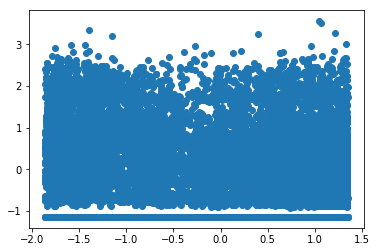

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x[:,0],x[:,1], label='True Position') 

In [19]:
kmeans = KMeans(n_clusters=100)  
kmeans.fit(x) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

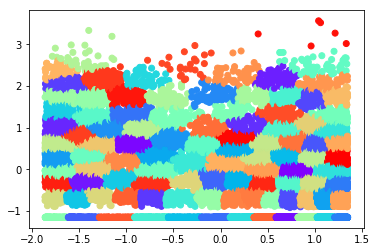

In [20]:
plt.scatter(x[:,0],x[:,1], c=kmeans.labels_, cmap='rainbow')  

In [21]:
print(kmeans.labels_)  

[62 62 50 ... 73 17 17]


In [22]:
df['mood_label'] = kmeans.labels_
df['emotion_vec'] = emotion_vec

In [23]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,text_cleaned,emotional_state,date,duration,mood_label,emotion_vec
0,Twitter for iPhone,Democrats just blocked @FoxNews from holding a...,3/7/19 0:05,39620,163793,False,1.103450e+18,democrat block hold debat good think thing fak...,[[[0. 0. 0. 0. ...,2019-03-07 00:05:00,431700.0,62,"[0.0, 0.0, 0.0, 0.0, 0.33333333, 0.7345, 0.352..."
1,Twitter for iPhone,Wall Street Journal: “More migrant families cr...,3/7/19 0:02,23578,94096,False,1.103450e+18,wall street journal migrant famili cross u ill...,[[[0.25 0.448 0.321 0.569]\n [0. 0. 0....,2019-03-07 00:02:00,431880.0,62,"[0.25, 0.448, 0.321, 0.569, 0.0, 0.0, 0.0, 0.0..."
2,Twitter for iPhone,Congressman Chris Stewart: “No one is accusing...,3/6/19 23:56,24546,88892,False,1.103440e+18,congressman chri stewart one accus presid crim...,[[[0.5 0.071 0.943 0.63 ]\n [0. 0. 0....,2019-03-06 23:56:00,432240.0,50,"[0.5, 0.071, 0.943, 0.63, 0.0, 0.0, 0.0, 0.0, ..."
3,Twitter for iPhone,American Workforce Policy Advisory Board Meeti...,3/6/19 22:04,10818,43018,False,1.103420e+18,american workforc polici advisori board meet,[[[0. 0. 0. 0. ]\n [1. 0.592 0....,2019-03-06 22:04:00,438960.0,66,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.592, 0.255, 0.385,..."
4,Twitter for iPhone,It is shameful that House Democrats won’t take...,3/6/19 19:50,28268,107157,False,1.103380e+18,shame hous democrat take stronger stand anti s...,[[[0.25 0.102 0.793 0.625]\n [0. 0. 0....,2019-03-06 19:50:00,447000.0,21,"[0.25, 0.102, 0.793, 0.625, 0.0, 0.0, 0.0, 0.0..."


In [37]:
OUTPUT_PATH = './data/trump_tweet_moods.csv'
mood_df = []
for mood, group in df.groupby('mood_label'):
    print(mood)
    emotion_vec = []
    tweets = ''
    for index, row in group.iterrows():
        
        emotion_vec.append(row['emotion_vec'])
        tweets = tweets + row['text_cleaned']
        
        #print(row['emotion_vec'])
    
    emotion_vec = np.array(emotion_vec)
    mood_vec = np.mean(emotion_vec, axis=0)
    mood_vec_out = []
    
    #mood_vec = np.array([mood_vec[0:4], 
    #            mood_vec[4:8],
    #           mood_vec[8:12],
    #            mood_vec[12:16],
    #            mood_vec[16:20],
    #            mood_vec[20:23],
    #            mood_vec[23:27],
    #            mood_vec[27:31]])
    
    for i in range(0, len(mood_vec) - 1, 4):
        print("i: {}; i+4: {}".format(i, i+4))
        mood_vec_out.append(mood_vec[i:i+4])
        
    mood_vec_out = np.array([mood_vec_out])
    
    print(mood_vec_out)
    mood_df.append({
        'mood_label': mood,
        'mood_vec': mood_vec_out,
        'tweets_text': tweets
    })

mood_df = pd.DataFrame(mood_df)
mood_df.to_csv(OUTPUT_PATH, sep=',', encoding='utf-8', index=False)

0
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.07997744 0.0342775  0.15065736 0.08867766]
  [0.17081218 0.25443401 0.17192047 0.21753384]
  [0.03730964 0.02674873 0.06428003 0.03307191]
  [0.13821207 0.10891878 0.23420812 0.17144416]
  [0.14251269 0.29577665 0.16375381 0.20585025]
  [0.09782854 0.04434772 0.17584518 0.10500761]
  [0.16896503 0.26017766 0.2937022  0.34656007]
  [0.1643824  0.26861802 0.18579484 0.25609349]]]
1
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.06843782 0.05554144 0.21218488 0.128852  ]
  [0.22907321 0.62799182 0.41315991 0.50006527]
  [0.04620075 0.04816302 0.14816576 0.09212568]
  [0.06700799 0.0666459  0.20263002 0.14074489]
  [0.1822351  0.60034107 0.3728602  0.45198953]
  [0.07912017 0.06131785 0.21042532 0.13796357]
  [0.09850919 0.3340929  0.22487158 0.25195628]
  [0.22941577 0.60908151 0.38680647 0.525169

i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.00615385 0.00088    0.00372923 0.00172923]
  [0.19692308 0.10639385 0.06539077 0.09495692]
  [0.01846154 0.00572308 0.00964    0.00419077]
  [0.01692308 0.00480615 0.01337538 0.00931385]
  [0.         0.         0.         0.        ]
  [0.02307692 0.00778    0.01067385 0.00954615]
  [0.52615385 0.3406359  0.37887282 0.47406359]
  [0.21230769 0.15087231 0.10636615 0.15692923]]]
23
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.12999818 0.10039695 0.30347964 0.20331679]
  [0.17129832 0.38702354 0.2339173  0.31993766]
  [0.06541561 0.06853053 0.15676718 0.11832824]
  [0.10927844 0.11057888 0.2665598  0.20238804]
  [0.14835211 0.41360941 0.21605471 0.3268715 ]
  [0.09232703 0.06547201 0.20300891 0.12672265]
  [0.04794317 0.12229008 0.11563359 0.12627099]
  [0.23538713 0.48577545 0.31561959 0.4676533

i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.12083046 0.16221476 0.4810748  0.34618835]
  [0.16526084 0.5903259  0.44570161 0.52355904]
  [0.07471337 0.12886747 0.29398695 0.21713153]
  [0.13535968 0.23065311 0.5018489  0.38781376]
  [0.12204161 0.55273695 0.35008936 0.43961647]
  [0.08716053 0.11467269 0.36613855 0.23883333]
  [0.10514457 0.40069277 0.41829518 0.41795582]
  [0.18948893 0.60683161 0.41021589 0.57896353]]]
43
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.09203088 0.09908676 0.25470205 0.19150342]
  [0.22133344 0.58826598 0.40889669 0.47808048]
  [0.04574092 0.04088014 0.13920205 0.08369521]
  [0.10421287 0.12449658 0.27384589 0.21593151]
  [0.1609589  0.53040868 0.34373402 0.40115753]
  [0.06893075 0.05063356 0.18794521 0.11107534]
  [0.08779082 0.27860959 0.2062637  0.22007534]
  [0.21900141 0.58493265 0.40384361 0.5146700

  [0.48102981 0.35136179 0.25899187 0.38271951]]]
68
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.05769231 0.02530769 0.06332692 0.04434615]
  [0.22628205 0.30182212 0.16952404 0.243375  ]
  [0.03125    0.01732692 0.04483654 0.02270192]
  [0.11698718 0.07527885 0.13264423 0.10429327]
  [0.10897436 0.15220192 0.06957212 0.10391827]
  [0.08814103 0.04004808 0.101875   0.06492308]
  [0.07451923 0.09991827 0.10102404 0.122875  ]
  [0.29615385 0.41145673 0.27260337 0.40402564]]]
69
i: 0; i+4: 4
i: 4; i+4: 8
i: 8; i+4: 12
i: 12; i+4: 16
i: 16; i+4: 20
i: 20; i+4: 24
i: 24; i+4: 28
i: 28; i+4: 32
[[[0.08654575 0.09979198 0.3741972  0.24758079]
  [0.15897674 0.53961438 0.41967468 0.46955598]
  [0.06521072 0.08425954 0.26081679 0.1779771 ]
  [0.12306057 0.17790013 0.45000891 0.34150573]
  [0.14369131 0.55352608 0.36898664 0.44802481]
  [0.08066956 0.06516158 0.31810814 0.20055852]
  [0.15890886 0.4858028  0.53987341 0.56